In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
data = pd.read_csv('df_final.csv')


In [4]:
print(data.head())


     Country  Annual.GDP.Growth        Date  Last_inflation Operating.Region  \
0    Albania               2.31  2019-06-19            1.30           Europe   
1    Algeria               1.50  2019-03-19            1.80           Africa   
2     Angola              -0.10  2019-06-19           16.08           Africa   
3  Argentina               0.60  2019-06-19           53.50          America   
4    Armenia               6.50  2019-06-19            0.50             Asia   

     Scope gdp_cat  
0  Include  Medium  
1  Include     Low  
2  Include     Low  
3  Include     Low  
4  Include    High  


In [5]:
data['gdp_cat'] = data['gdp_cat'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [6]:
data = data.drop(columns=['Country', 'Date', 'Operating.Region', 'Scope'])


In [7]:
data = data.dropna()


In [8]:
X = data.drop('gdp_cat', axis=1)
y = data['gdp_cat']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
clf = DecisionTreeClassifier(random_state=42)


In [11]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)


In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



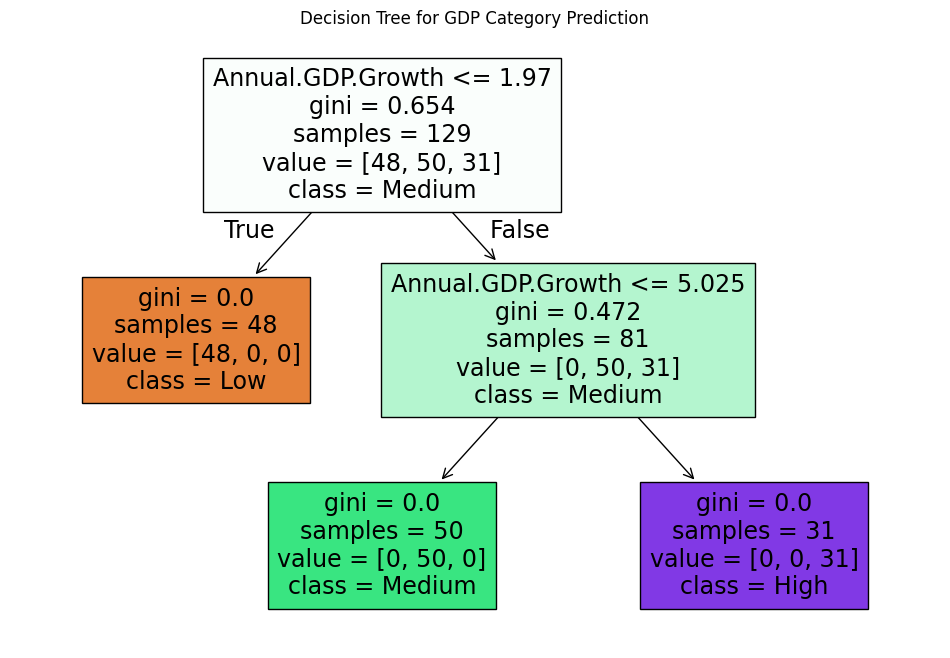

In [14]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Low', 'Medium', 'High'])
plt.title('Decision Tree for GDP Category Prediction')
plt.show()

In [15]:
import joblib

   # Save the trained model
joblib.dump(clf, 'gdp_decision_tree_model.pkl')   

['gdp_decision_tree_model.pkl']